<h1>Лабораторная работа №5</h1>
<h2><i>Анализ временных рядов</i></h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from fbprophet import Prophet

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('los-angeles-international-airport-passenger-count-by-carrier-type.csv')
df_train.info()

,DataExtractDate,ReportPeriod,Arrival_Departure,Domestic_International,FlightType,Passenger_Count
0,2014-05-01T00:00:00,2006-01-01T00:00:00,Arrival,Domestic,Charter,2457
1,2014-05-01T00:00:00,2006-01-01T00:00:00,Arrival,Domestic,Commuter,139728
2,2014-05-01T00:00:00,2006-01-01T00:00:00,Arrival,Domestic,Scheduled Carriers,1538812
3,2014-05-01T00:00:00,2006-01-01T00:00:00,Arrival,International,Charter,332
4,2014-05-01T00:00:00,2006-01-01T00:00:00,Arrival,International,Commuter,1280


In [ ]:
df_train.head()

In [3]:
filtredData = df_train[['ReportPeriod','Passenger_Count']]
filtredData.head()

,ReportPeriod,Passenger_Count
0,2006-01-01T00:00:00,2457
1,2006-01-01T00:00:00,139728
2,2006-01-01T00:00:00,1538812
3,2006-01-01T00:00:00,332
4,2006-01-01T00:00:00,1280


In [4]:
groupedData = filtredData.groupby(['ReportPeriod']).sum().reset_index()
groupedData['ReportPeriod'] = pd.to_datetime(groupedData['ReportPeriod'])
print(groupedData.shape)
groupedData.tail()

(154, 2)


,ReportPeriod,Passenger_Count
149,2018-06-01,8012469
150,2018-07-01,8430430
151,2018-08-01,8137410
152,2018-09-01,6882524
153,2018-10-01,7257286


In [5]:
groupedData.columns = ['ds', 'y'] # работа с Prophet

predictions = 6 # количество месяцев для тестирования 
train = groupedData[:-predictions]

In [6]:
testModel = Prophet(weekly_seasonality=True, daily_seasonality=True)
testModel.fit(train)

In [7]:
testFuture = groupedData[-predictions:]
testForecast = testModel.predict(testFuture)
testForecast.shape

(6, 22)

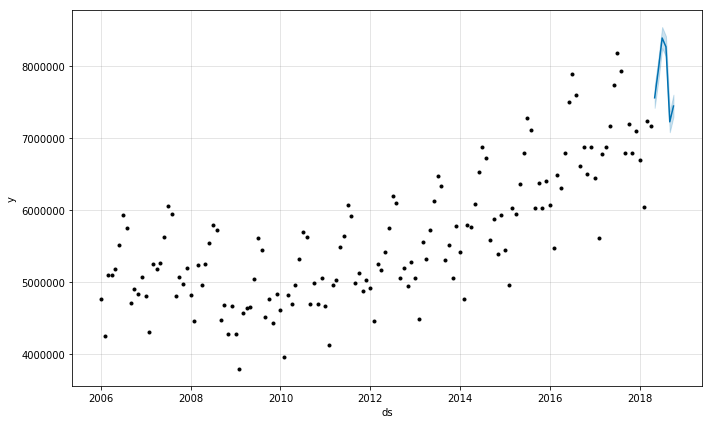

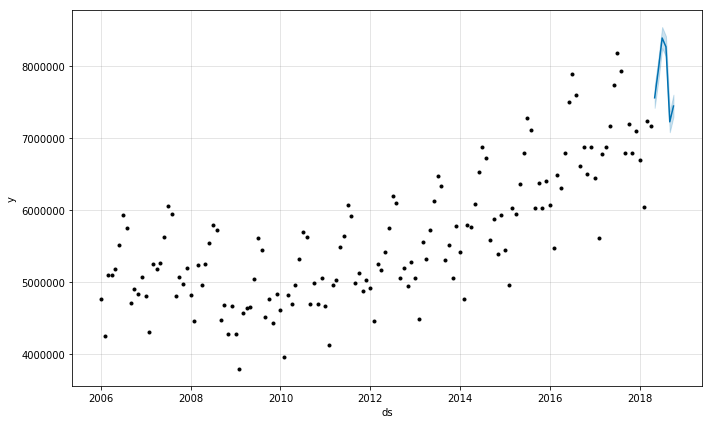

In [8]:
testModel.plot(testForecast)

In [9]:
print(', '.join(testForecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, daily, daily_lower, daily_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [10]:
compare = testForecast.set_index('ds')[['yhat']].join(groupedData.set_index('ds'))
compare = compare.reset_index()
compare

,ds,yhat,y
0,2018-05-01,7.554446e+06,7544877
1,2018-06-01,7.952643e+06,8012469
2,2018-07-01,8.385079e+06,8430430
3,2018-08-01,8.262422e+06,8137410
4,2018-09-01,7.220839e+06,6882524
5,2018-10-01,7.439987e+06,7257286


<h3>Оценка погрешности</h3>

In [11]:
compare['difference'] = abs(compare['y'] - compare['yhat'])
compare['error'] = 100 * (compare['difference'] / compare['y'])
np.mean(abs(compare['error']))

1.7301228519830165

In [12]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(groupedData)

future = model.make_future_dataframe(periods = 3, freq = 'M', include_history = False)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-31,7.224981e+06,7.131128e+06,7.436402e+06,7.224981e+06,7.224981e+06,57067.205356,57067.205356,57067.205356,346605.486935,...,8160.932207,8160.932207,8160.932207,-297699.213786,-297699.213786,-297699.213786,0.0,0.0,0.0,7.282048e+06
1,2018-11-30,7.255888e+06,7.259355e+06,7.556535e+06,7.255433e+06,7.256729e+06,145726.399595,145726.399595,145726.399595,346605.486935,...,12327.118205,12327.118205,12327.118205,-213206.205544,-213206.205544,-213206.205544,0.0,0.0,0.0,7.401614e+06
2,2018-12-31,7.287824e+06,6.961808e+06,7.262243e+06,7.285520e+06,7.290649e+06,-169601.782247,-169601.782247,-169601.782247,346605.486935,...,-46580.463576,-46580.463576,-46580.463576,-469626.805606,-469626.805606,-469626.805606,0.0,0.0,0.0,7.118222e+06


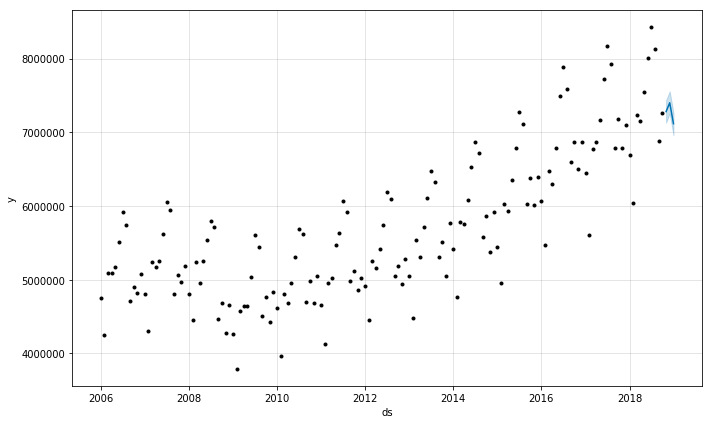

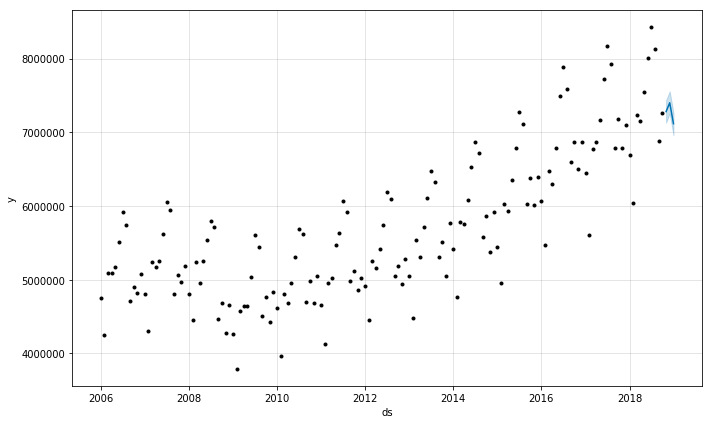

In [13]:
model.plot(forecast)